Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8".

In [3]:
import pandas as pd

# Зчитування таблиці з веб-сторінки
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', decimal=',', thousands='.', flavor='bs4')

# Вибір потрібної таблиці
# Можливо, потрібно змінити індекс таблиці, якщо це не та таблиця
table_index = 0
df = tables[table_index]

# Виведення перших рядків таблиці
#print(data.head())
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Вивести перші рядки таблиці за допомогою методу head

In [66]:
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [67]:
print(df.shape)

(28, 9)


Замініть у таблиці значення "—" на значення NaN

In [4]:
import numpy as np

# Заміна значень "—" на NaN
#df.replace("—", pd.NA, inplace=True)
#df.replace(pd.NA, np.nan, inplace=True)
df.replace("—", np.nan, inplace=True)

# Виведення перших рядків з оновленою таблицею
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [69]:
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [5]:
df["2014"]=pd.to_numeric(df['2014'], errors='coerce')
df["2019"]=pd.to_numeric(df['2019'], errors='coerce')
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [85]:
# Порахунок частки пропусків у кожному стовпці
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Частка пропусків у кожній колонці:")
print(missing_percentage)

Частка пропусків у кожній колонці:
Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


Видаліть з таблиці дані по всій країні, останній рядок таблиці.

In [6]:
df.drop(df.tail(1).index, inplace=True)
#df = df.iloc[:-1]
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [7]:
#print(df['1950'].mean())
##df['1950'].fillna(df['1950'].mean()[0], inplace=True)
##df['1950'].fillna(df['1950'].mode()[0], inplace=True)
df['1950'].fillna(df['1950'].mean(), inplace=True)
df['1960'].fillna(df['1960'].mean(), inplace=True)
df['1970'].fillna(df['1970'].mean(), inplace=True)
df['2014'].fillna(df['2014'].mean(), inplace=True)
df['2019'].fillna(df['2019'].mean(), inplace=True)

print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012    2014       2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.144   8.017391
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.900   7.600000
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.100  10.100000
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.100   7.100000
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.200   8.017391


Отримайте список регіонів, де рівень народжуваності у 3 році був вищим за середній по Україні

In [8]:
# #threshold = df[1::].mean()
# selected_columns = df.iloc[:, 1:]
# threshold = selected_columns.mean().mean()
threshold = df["2019"].mean()
print(threshold)
filtered_rows = df.loc[df['2019'] > threshold]
print(filtered_rows)

8.017391304347827
               Регіон    1950  1960  1970  1990  2000  2012  2014  2019
2           Волинська  24.700  25.0  17.9  15.3  11.2  14.8  14.1  10.1
6        Закарпатська  31.400  27.3  20.7  16.8  11.5  15.1  14.6  10.4
8   Івано-Франківська  24.300  24.8  18.2  15.5  10.3  12.4  12.2   8.8
12          Львівська  23.400  24.0  17.1  14.0   9.1  11.9  11.9   8.7
14            Одеська  24.100  19.2  14.8  12.6   8.0  12.7  12.3   8.8
16         Рівненська  26.900  26.7  19.3  15.8  11.8  15.9  14.8  10.7
20         Херсонська  20.800  21.4  16.6  14.3   8.5  11.7  11.5   8.1
23        Чернівецька  24.700  21.8  17.0  14.8  10.1  12.8  12.9   9.2
25               Київ  23.104  17.4  15.9  12.0   7.3  12.0  12.1  11.0


У якому регіоні була найвища народжуваність у 2014 році?

In [9]:
threshold = df["2014"].max()
print(threshold)
filtered_rows = df.loc[df['2014'] == threshold]
print(filtered_rows)

14.8
        Регіон  1950  1960  1970  1990  2000  2012  2014  2019
16  Рівненська  26.9  26.7  19.3  15.8  11.8  15.9  14.8  10.7


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

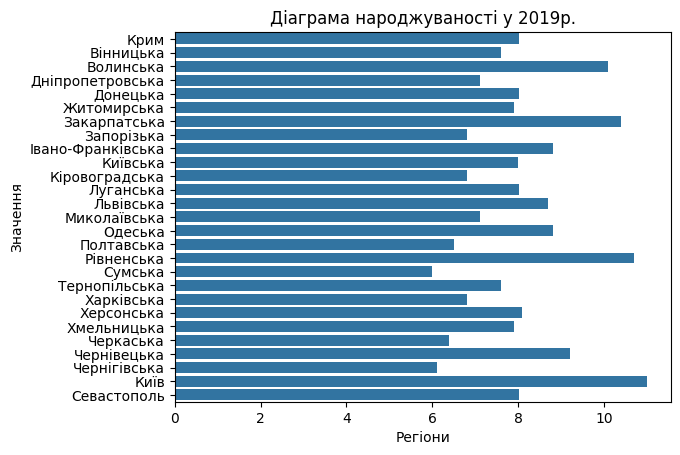

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Дані для побудови діаграми
categories = df['Регіон']
values = df['2019']

# Побудова стовпчикової діаграми
#plt.bar(categories, values)
#plt.barh(categories, values)
sns.barplot(x=values, y=categories)

# Поворот підписів по осі X на 90 градусів
#plt.xticks(rotation=90)
#plt.yticks(rotation=20)

# Додавання заголовка і підписів до вісей
plt.title('Діаграма народжуваності у 2019р.')
plt.xlabel('Регіони')
plt.ylabel('Значення')

# Показати діаграму
plt.show()

In [11]:
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.400,19.200000,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.400,20.400000,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.100,21.400000,14.0,10.9,6.1,9.8,8.200,8.017391
5,Житомирська,26.100,22.300000,15.9,12.9,8.9,12.2,12.000,7.900000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
7,Запорізька,21.900,19.700000,15.0,12.4,7.1,10.6,10.600,6.800000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
9,Київська,20.400,18.900000,15.6,12.3,7.3,12.2,12.100,8.000000


<ipython-input-13-9d965f532441>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Регіон'], y=df['2019'], palette='viridis')


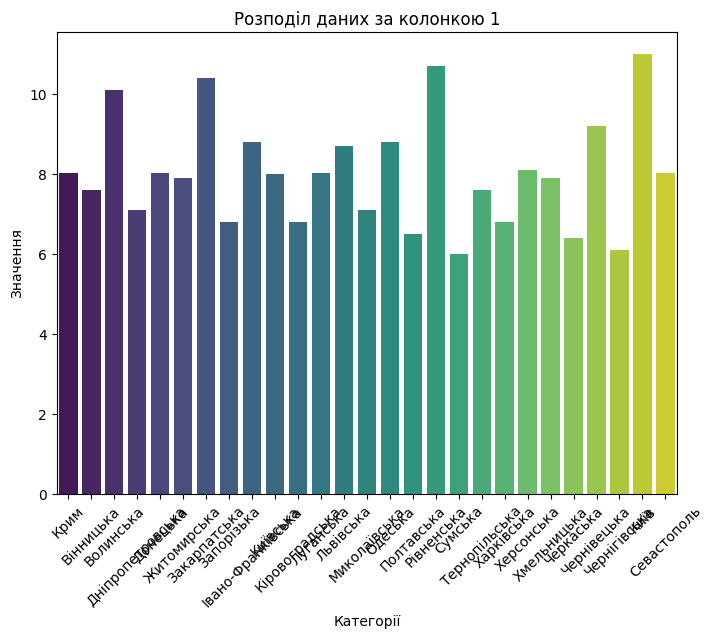

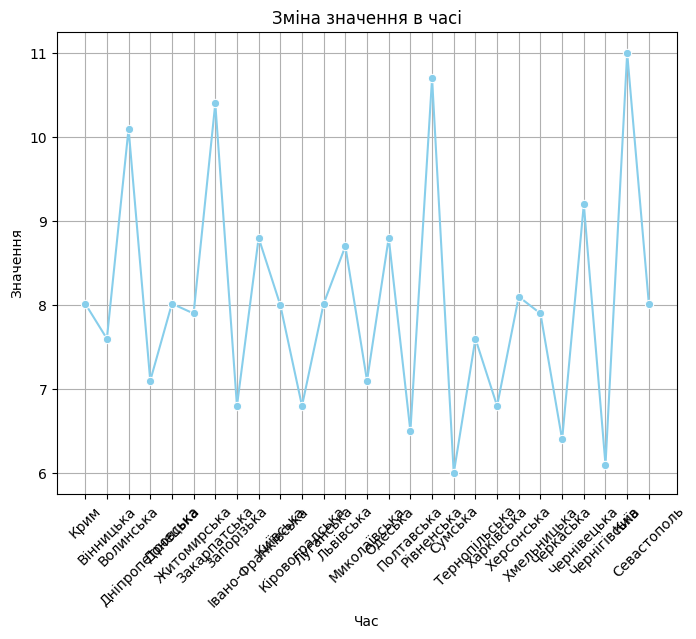

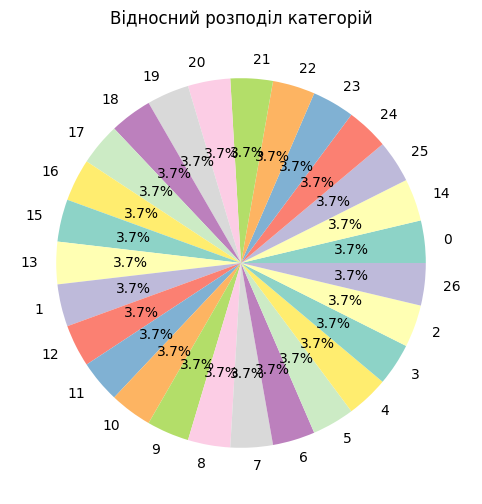

<ipython-input-13-9d965f532441>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Регіон', y='2019', palette='pastel')


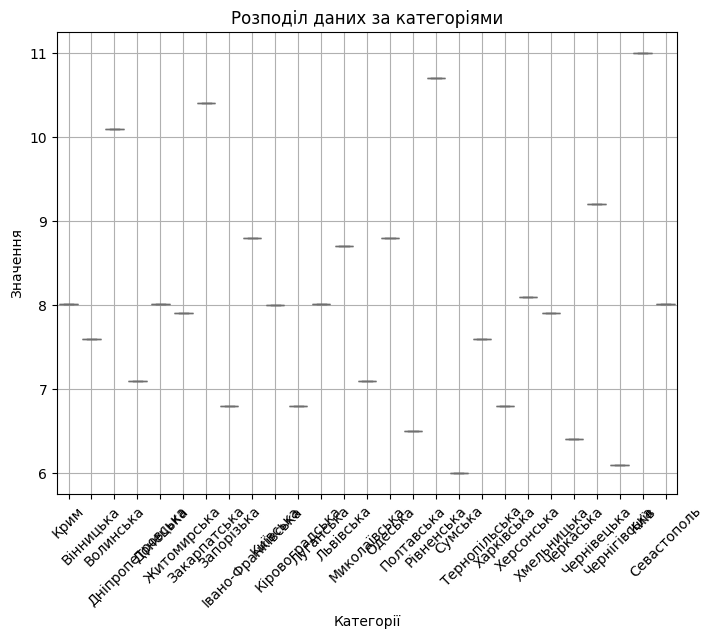

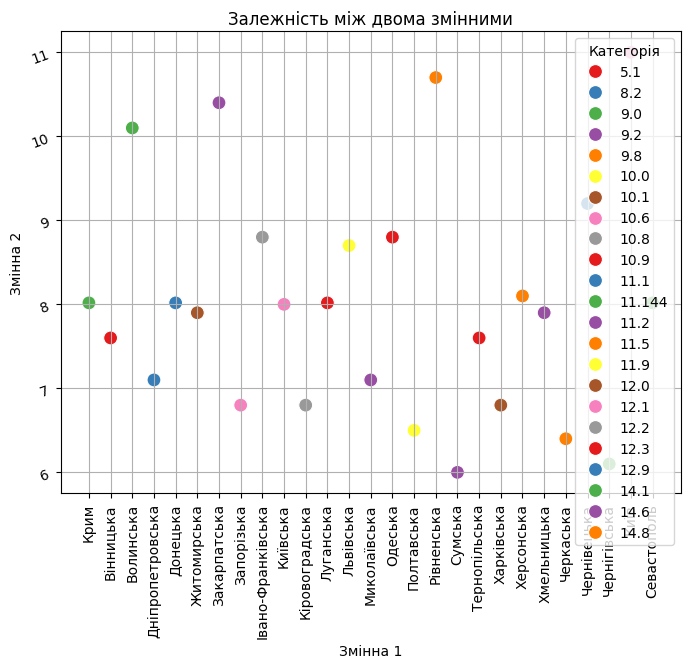

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Стовпчикова діаграма (Bar chart)
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Регіон'], y=df['2019'], palette='viridis')
plt.title('Розподіл даних за колонкою 1')
plt.xlabel('Категорії')
plt.ylabel('Значення')
plt.xticks(rotation=45)
plt.show()

# 2. Лінійний графік (Line plot)
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Регіон', y='2019', marker='o', color='skyblue')
plt.title('Зміна значення в часі')
plt.xlabel('Час')
plt.ylabel('Значення')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Кругова діаграма (Pie chart)
plt.figure(figsize=(8, 6))
df.index.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Відносний розподіл категорій')
plt.ylabel('')
plt.show()

# 4. Ящик з вусами (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Регіон', y='2019', palette='pastel')
plt.title('Розподіл даних за категоріями')
plt.xlabel('Категорії')
plt.ylabel('Значення')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Точкова діаграма (Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Регіон', y='2019', hue='2014', palette='Set1', s=100)
plt.title('Залежність між двома змінними')
plt.xlabel('Змінна 1')
plt.ylabel('Змінна 2')
# Поворот підписів по осі X на 90 градусів
plt.xticks(rotation=90)
plt.yticks(rotation=20)

plt.legend(title='Категорія')
plt.grid(True)
plt.show()
